# Introduction

This dataset that we are going to be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because ["they're good dogs Brent."](https://knowyourmeme.com/memes/theyre-good-dogs-brent). WeRateDogs has over 4 million followers and has received international media coverage.

We are going to analyze some series of datasets, all of them from Udacity, related to the WeRateDogs twitter.

In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

---

## First DF, given by Udacity!
### This one is the twitter archive of WeRateDogs

In [2]:
fonte = 'twitter-archive-enhanced.csv'
df_tw = pd.read_csv(fonte)
df_tw.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


### Assessments

In [3]:
df_tw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

* This give us a great panorama of the DF, non-null values, column names, and the type of each column

In [4]:
df_tw.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

* Just a sanity check of null values, we can see this with the info command above too

In [5]:
# None, a, The, an...
# pd.set_option("max_rows", None)
df_tw['name'].value_counts(dropna=False)                        

None          745
a              55
Charlie        12
Lucy           11
Cooper         11
             ... 
Derby           1
Christoper      1
Bloop           1
Banditt         1
DonDon          1
Name: name, Length: 957, dtype: int64

In [6]:
mask = df_tw.name.str.contains('^[a-z]', regex = True)
df_tw[mask].name.value_counts().sort_index()

a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old              1
one              4
quite            4
space            1
such             1
the              8
this             1
unacceptable     1
very             5
Name: name, dtype: int64

* Getting a list of some strange dog names (Like this words in lower case, a, an, The)

In [7]:
df_tw['rating_denominator'].value_counts()

10     2333
11        3
50        3
20        2
80        2
0         1
120       1
7         1
170       1
150       1
130       1
90        1
110       1
2         1
70        1
40        1
16        1
15        1
Name: rating_denominator, dtype: int64

In [8]:
sum(df_tw['rating_denominator'].value_counts()) - 2333

23

* Most common denominator, probably removing all besides 10. (Only 23 entries)

In [9]:
df_tw['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
0         2
15        2
75        2
420       2
182       1
204       1
143       1
121       1
99        1
20        1
45        1
27        1
17        1
24        1
26        1
44        1
50        1
60        1
80        1
84        1
88        1
1776      1
960       1
666       1
144       1
165       1
Name: rating_numerator, dtype: int64

In [10]:
df_tw.query('doggo == "doggo" | floofer == "floofer" | pupper == "pupper" | puppo == "puppo"').shape[0]

380

* Checking the number of Dog stages

In [11]:
df_tw.query('tweet_id == 666020888022790149')['text']

2355    Here we have a Japanese Irish Setter. Lost eye...
Name: text, dtype: object

In [12]:
df_tw.iloc[2355,5]

'Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj'

In [13]:
df_tw['source'][0]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

* Was just taking a look at some text on the df

---

## Second DF, this one was hosted on Udacity's servers and should be downloaded programmatically
### This DF is the tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network.

In [14]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)

df_img = pd.read_csv('image_predictions.tsv', sep='\t')

In [15]:
df_img.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


### Assessments

In [16]:
df_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
df_img['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

* Checking that we have some NoN doggos on the DF (according to the Neural Net)

---

## Third DF, this one we will query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON

In [18]:
from tweepy import OAuthHandler
from timeit import default_timer as timer

---

In [14]:
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [15]:
tweet_ids = df_tw.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode = 'extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

In [16]:
len(fails_dict)

25

----

In [19]:
# We just need the retweet and favourite counts

tweets_list =[]

with open('tweet_json.txt') as file:
    for i in file:
    
        tweets_dict = {}
        tweets_json = json.loads(i)
        
        tweets_dict['tweet_id'] = tweets_json['id']
        tweets_dict['retweet_count'] = tweets_json['retweet_count']
        tweets_dict['favorite_count'] = tweets_json['favorite_count']
        
        tweets_list.append(tweets_dict)

In [20]:
df_api = pd.DataFrame(tweets_list)

### Assessments

In [21]:
df_api.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7353,35014
1,892177421306343426,5482,30322
2,891815181378084864,3624,22800
3,891689557279858688,7535,38284
4,891327558926688256,8120,36559


In [22]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2331 non-null   int64
 1   retweet_count   2331 non-null   int64
 2   favorite_count  2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


* There is nothing to see in this DF, just cheking values and types

---

# Quality and Tidiness Assessments

### 1) Twitter archive data

### Quality

* I'm changing the column 'name' to 'dog_name' (i got confused sometimes because of it);
* Clean the source column values;
* We have some dog_name set to None (745) instead of NaN;
* We have some strange names, like: a, an and The and some other words in lowercase;
* Some denominators are not 10, we can remove them because they are not that significant (Only 23);
* I could remove some numerators too, but i think i can do some good things with them;
* Remove the reply columns (in_reply_to_status_id, in_reply_to_user_id) (I dont see any use to this one);
* Remove the retweets rows, since retweets are essentially duplicates of the actual tweets and so they may skew the result of your analysis (e.g. by double-counting the ratings). 
* Remove the retweet columns(retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)(I dont see any use to this one).

### Tidiness

* Dog stages should be a single column rather than four

### 2) Image prediction dataset

### Quality

* Remove where p1_dog is False, because probably this picture is not a doggo and even if they are, the neural net got it wrong;
* Remove the p1_dog column after, because we already know they are doggos, im leaving the p1 and p1_conf;
* Changing p1 and p1_conf to something else;
* Remove all the p2's and p3's columns, im trusting only on the p1 results.

### 3)  Retweet/Favourite API dataset

### Tidiness

* We have information in all datasets about the same tweet, so we will join them in one single dataset in the end. So the only thing we are doing with this dataset, is merging (left join) it with the other datasets (the twitter archive data and img predict)

-----

# Cleaning

In [23]:
# Copy of the dfs
df_tw_clean = df_tw.copy()
df_img_clean = df_img.copy()
df_api_clean = df_api.copy()

### 1) Twitter archive data

### Define
* Change the column 'name' to 'dog_name'

### Code

In [24]:
df_tw_clean.rename(columns={'name': 'dog_name'}, inplace = True)

### Test

In [25]:
df_tw_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'dog_name', 'doggo', 'floofer', 'pupper',
       'puppo'],
      dtype='object')

In [26]:
df_tw_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


### Define
* Make the source more practical

### Code

In [27]:
df_tw_clean['source'] = df_tw_clean['source'].str.extract('\>(.*?)\<')

### Test

In [28]:
df_tw_clean.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [29]:
df_tw_clean['source'].value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

### Define
* None to NaN in dog_name column

### Code

In [30]:
df_tw_clean.query('dog_name == "None"').shape

(745, 17)

In [31]:
np.nan

nan

In [32]:
df_tw_clean['dog_name'].replace("None", np.nan, inplace = True)

### Test

In [33]:
df_tw_clean.query('dog_name == "None"').shape

(0, 17)

In [34]:
df_tw_clean['dog_name'].value_counts()

a             55
Charlie       12
Lucy          11
Cooper        11
Oliver        11
              ..
Derby          1
Christoper     1
Bloop          1
Banditt        1
DonDon         1
Name: dog_name, Length: 956, dtype: int64

In [35]:
df_tw_clean.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
dog_name                       745
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

### Define
* Solve the dogs with weird (probably wrong) names: a,an, one and The and lower case words

### Code

In [36]:
#pd.set_option("max_rows", 20)
df_tw_clean['dog_name'].value_counts()

a             55
Charlie       12
Lucy          11
Cooper        11
Oliver        11
              ..
Derby          1
Christoper     1
Bloop          1
Banditt        1
DonDon         1
Name: dog_name, Length: 956, dtype: int64

In [37]:
df_tw_clean['dog_name'].replace(to_replace = ['a', 'an', 'The', 'One'],
                       value= np.nan, inplace=True)

In [38]:
mask = df_tw.name.str.contains('^[a-z]', regex = True)
repl = df_tw[mask].name
repl = repl.unique()
repl

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

In [39]:
df_tw_clean['dog_name'].replace(to_replace = repl,
                       value= np.nan, inplace=True)

### Test

In [40]:
df_tw_clean['dog_name'].value_counts()

Charlie    12
Cooper     11
Lucy       11
Oliver     11
Tucker     10
           ..
Banditt     1
Glacier     1
Rambo       1
Fillup      1
DonDon      1
Name: dog_name, Length: 931, dtype: int64

In [41]:
sum(df_tw_clean['dog_name'].isnull())

854

### Define
* Dog stages should be a single column rather than four;

### Code

In [42]:
df_tw_clean.loc[(df_tw_clean[['doggo', 'floofer', 'pupper', 'puppo']] != 'None').sum(axis=1) > 1].shape

(14, 17)

In [43]:
df_tw_clean.doggo.replace('None', '', inplace=True)
df_tw_clean.doggo.replace(np.NaN, '', inplace=True)

In [44]:
df_tw_clean.floofer.replace('None', '', inplace=True)
df_tw_clean.floofer.replace(np.NaN, '', inplace=True)

In [45]:
df_tw_clean.pupper.replace('None', '', inplace=True)
df_tw_clean.pupper.replace(np.NaN, '', inplace=True)

In [46]:
df_tw_clean.puppo.replace('None', '', inplace=True)
df_tw_clean.puppo.replace(np.NaN, '', inplace=True)

In [47]:
# Remember to convert None to empty string "" for all columns prior to
# running the following code.

df_tw_clean['stage'] = df_tw_clean.doggo + df_tw_clean.floofer + df_tw_clean.pupper + df_tw_clean.puppo
df_tw_clean.loc[df_tw_clean.stage == 'doggopupper', 'stage'] = 'doggo,pupper'
df_tw_clean.loc[df_tw_clean.stage == 'doggopuppo', 'stage'] = 'doggo,puppo'
df_tw_clean.loc[df_tw_clean.stage == 'doggofloofer', 'stage'] = 'doggo,floofer'

In [48]:
df_tw_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], inplace = True, axis = 1)

In [49]:
df_tw_clean['stage'].replace('', np.nan, inplace = True)

### Test

In [50]:
df_tw_clean['stage'].value_counts()

pupper           245
doggo             83
puppo             29
doggo,pupper      12
floofer            9
doggo,floofer      1
doggo,puppo        1
Name: stage, dtype: int64

In [51]:
df_tw_clean['stage'].isnull().sum()

1976

In [52]:
df_tw_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,dog_name,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


### Define
* Remove denominators that are not 10

### Code

In [53]:
df_tw_clean.query('rating_denominator != 10').shape

(23, 14)

In [54]:
df_tw_clean.drop(df_tw_clean.query('rating_denominator != 10').index, inplace=True)

### Test

In [55]:
df_tw_clean.query('rating_denominator != 10').shape

(0, 14)

### Define
* Remove the reply columns

### Code

In [56]:
df_tw_clean.drop('in_reply_to_status_id', inplace = True, axis = 1)

In [57]:
df_tw_clean.drop('in_reply_to_user_id', inplace = True, axis = 1)

### Test

In [58]:
df_tw_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'dog_name',
       'stage'],
      dtype='object')

### Define
* Remove the rows where we have retweeted

### Code

In [59]:
df_tw_clean.drop(
df_tw_clean.query('retweeted_status_timestamp == retweeted_status_timestamp | retweeted_status_user_id == retweeted_status_user_id | retweeted_status_timestamp == retweeted_status_timestamp').
index, inplace = True)

### Test

In [60]:
df_tw_clean.query('retweeted_status_timestamp == retweeted_status_timestamp | retweeted_status_user_id == retweeted_status_user_id | retweeted_status_timestamp == retweeted_status_timestamp')

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,dog_name,stage


### Define
* Remove the retweeted columns

### Code

In [61]:
df_tw_clean.drop('retweeted_status_id', inplace = True, axis = 1)

In [62]:
df_tw_clean.drop('retweeted_status_user_id', inplace = True, axis = 1)

In [63]:
df_tw_clean.drop('retweeted_status_timestamp', inplace = True, axis = 1)

### Test

In [64]:
df_tw_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'dog_name', 'stage'],
      dtype='object')

### 2) Image prediction dataset

### Define
* Remove where p1_dog is False

In [65]:
df_img_clean.shape

(2075, 12)

In [66]:
df_img_clean.query('p1_dog == False')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2026,882045870035918850,https://pbs.twimg.com/media/DD2oCl2WAAEI_4a.jpg,1,web_site,0.949591,False,dhole,0.017326,False,golden_retriever,0.006941,True
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False


In [67]:
df_img_clean.drop(df_img_clean.query('p1_dog == False').index, inplace=True)

### Test

In [68]:
df_img_clean.query('p1_dog == False')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Define
* Remove the p1_dog column now that we got only dogs

### Code

In [69]:
df_img_clean.drop('p1_dog', inplace = True, axis = 1)

### Test

In [70]:
df_img_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

### Define
* Change p1 and p1_conf

In [71]:
df_img_clean.rename(columns={'p1': 'breed', 'p1_conf': 'conf'}, inplace = True)

### Test

In [72]:
df_img_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'breed', 'conf', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

### Define
* Remove p2 and p3 columns

In [73]:
df_img_clean.drop(['p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], inplace = True, axis = 1)

### Test

In [74]:
df_img_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'breed', 'conf'], dtype='object')

### 3) Retweet/Favourite API dataset

### Define
* In this part i will only join the DF's

### Code

In [75]:
df_api_clean.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7353,35014
1,892177421306343426,5482,30322
2,891815181378084864,3624,22800
3,891689557279858688,7535,38284
4,891327558926688256,8120,36559


In [76]:
df_tw_en = pd.merge(left = df_tw_clean, right = df_api_clean, left_on='tweet_id', right_on='tweet_id', how='left')

In [77]:
df_tw_en = df_tw_en.merge(df_img_clean, on = 'tweet_id', how = 'left')

### Test

In [78]:
df_tw_en.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2153 entries, 0 to 2152
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2153 non-null   int64  
 1   timestamp           2153 non-null   object 
 2   source              2153 non-null   object 
 3   text                2153 non-null   object 
 4   expanded_urls       2099 non-null   object 
 5   rating_numerator    2153 non-null   int64  
 6   rating_denominator  2153 non-null   int64  
 7   dog_name            1388 non-null   object 
 8   stage               344 non-null    object 
 9   retweet_count       2146 non-null   float64
 10  favorite_count      2146 non-null   float64
 11  jpg_url             1462 non-null   object 
 12  img_num             1462 non-null   float64
 13  breed               1462 non-null   object 
 14  conf                1462 non-null   float64
dtypes: float64(4), int64(3), object(8)
memory usage: 269.1+

In [79]:
df_tw_en.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_name,stage,retweet_count,favorite_count,jpg_url,img_num,breed,conf
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,7353.0,35014.0,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,5482.0,30322.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,3624.0,22800.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,7535.0,38284.0,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,8120.0,36559.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712


# Storing the new csv

In [80]:
df_tw_en.to_csv(r'twitter_archive_master.csv', index = False, header=True)

In [81]:
df_test = pd.read_csv('twitter_archive_master.csv')

In [82]:
df_test.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_name,stage,retweet_count,favorite_count,jpg_url,img_num,breed,conf
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,7353.0,35014.0,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,5482.0,30322.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581


# Storing in a SQLite

In [83]:
from sqlalchemy import create_engine

In [84]:
engine = create_engine('sqlite:///doggo_archive.db', echo=True)
sqlite_connection = engine.connect()

2021-03-09 15:35:48,111 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2021-03-09 15:35:48,114 INFO sqlalchemy.engine.base.Engine ()
2021-03-09 15:35:48,116 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2021-03-09 15:35:48,119 INFO sqlalchemy.engine.base.Engine ()


In [85]:
sqlite_table = "doggo_archive"
df_tw_en.to_sql(sqlite_table, sqlite_connection, if_exists='fail')

2021-03-09 15:35:48,142 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("doggo_archive")
2021-03-09 15:35:48,143 INFO sqlalchemy.engine.base.Engine ()
2021-03-09 15:35:48,149 INFO sqlalchemy.engine.base.Engine PRAGMA temp.table_info("doggo_archive")
2021-03-09 15:35:48,150 INFO sqlalchemy.engine.base.Engine ()
2021-03-09 15:35:48,156 INFO sqlalchemy.engine.base.Engine 
CREATE TABLE doggo_archive (
	"index" BIGINT, 
	tweet_id BIGINT, 
	timestamp TEXT, 
	source TEXT, 
	text TEXT, 
	expanded_urls TEXT, 
	rating_numerator BIGINT, 
	rating_denominator BIGINT, 
	dog_name TEXT, 
	stage TEXT, 
	retweet_count FLOAT, 
	favorite_count FLOAT, 
	jpg_url TEXT, 
	img_num FLOAT, 
	breed TEXT, 
	conf FLOAT
)


2021-03-09 15:35:48,156 INFO sqlalchemy.engine.base.Engine ()
2021-03-09 15:35:48,165 INFO sqlalchemy.engine.base.Engine COMMIT
2021-03-09 15:35:48,168 INFO sqlalchemy.engine.base.Engine CREATE INDEX ix_doggo_archive_index ON doggo_archive ("index")
2021-03-09 15:35:48,171 INFO sqlalche

In [86]:
sqlite_connection.close()

----

# Analysis

In [87]:
df_tw_en.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_name,stage,retweet_count,favorite_count,jpg_url,img_num,breed,conf
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,7353.0,35014.0,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,5482.0,30322.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,3624.0,22800.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,7535.0,38284.0,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,8120.0,36559.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712


In [88]:
print("Number of doggos: {} \nNumber of floofers: {} \nNumber of puppers: {} \nNumber of puppos: {}".
      format(df_tw_en.query('stage == "doggo"').shape[0],df_tw_en.query('stage == "floofer"').shape[0], 
             df_tw_en.query('stage == "pupper"').shape[0], df_tw_en.query('stage == "puppo"').shape[0]))

Number of doggos: 75 
Number of floofers: 9 
Number of puppers: 224 
Number of puppos: 24


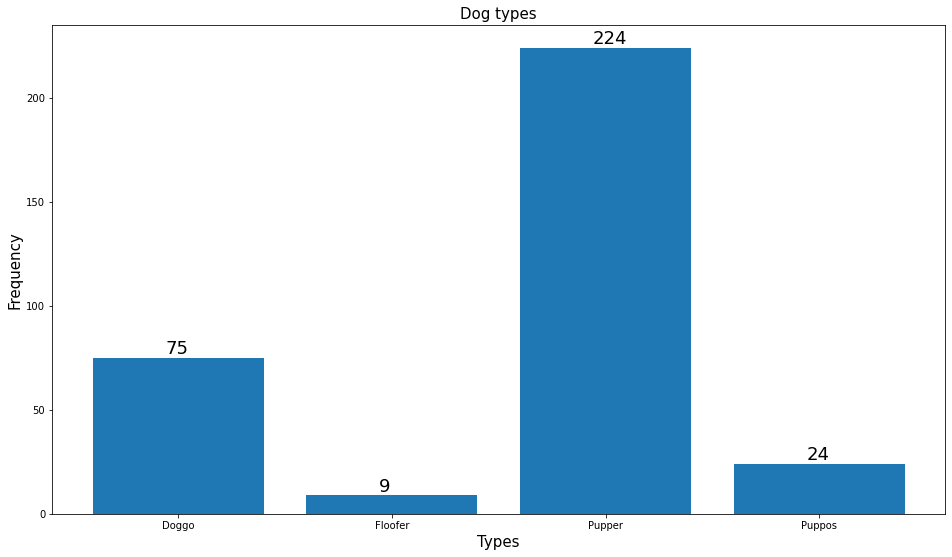

In [89]:
dog = ['Doggo', 'Floofer', 'Pupper', 'Puppos']
number = [df_tw_en.query('stage == "doggo"').shape[0], df_tw_en.query('stage == "floofer"').shape[0], 
          df_tw_en.query('stage == "pupper"').shape[0], df_tw_en.query('stage == "puppo"').shape[0]]

plt.figure(figsize = (16,9))
plt.bar(dog, number)
plt.xlabel('Types', fontsize = 15)
plt.ylabel('Frequency',  fontsize = 15)
plt.title('Dog types', fontsize = 15)

for index, value in enumerate(number):
    plt.text(index - 0.06, value + 2, str(value), fontsize = 18)

#### Insights
* We have a lot more Puppers than other types, maybe because most of the people send pictures of the dog when he is really small and cute.

In [90]:
df_tw_en['breed'].value_counts()[0:15]

golden_retriever            135
Labrador_retriever           92
Pembroke                     88
Chihuahua                    79
pug                          54
chow                         41
Samoyed                      40
toy_poodle                   38
Pomeranian                   38
malamute                     29
cocker_spaniel               27
French_bulldog               26
Chesapeake_Bay_retriever     23
miniature_pinscher           22
German_shepherd              20
Name: breed, dtype: int64

Text(0.5, 1.0, 'Breed Popularity (Based on image predictions)')

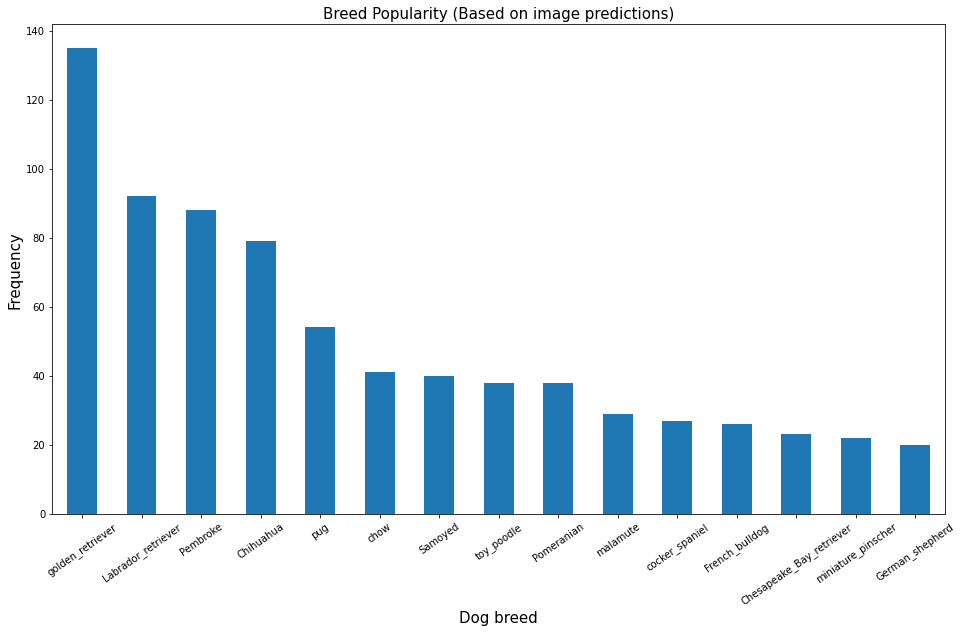

In [91]:
plt.figure(figsize = (16,9))
df_tw_en['breed'].value_counts()[0:15].plot(kind = 'bar')
plt.xlabel('Dog breed', fontsize = 15)
plt.xticks(rotation = 35)
plt.ylabel('Frequency', fontsize = 15)
plt.title('Breed Popularity (Based on image predictions)', fontsize = 15)

#### Insights

* We can see all the dog breeds here
* Golden retriever is by far the most popular!
* Got a little bit sad because there is not a single Akita nor Shiba inu, and i have one Akita

In [92]:
print("Average number of retweets: {:.0f} \nAverage number of favorites: {:.0f}".format(df_tw_en['retweet_count'].mean(), df_tw_en['favorite_count'].mean()))

Average number of retweets: 2346 
Average number of favorites: 7882


* Average number of retweets: 2593 
* Average number of favorites: 7326

Text(0.5, 1.0, 'Tweets source')

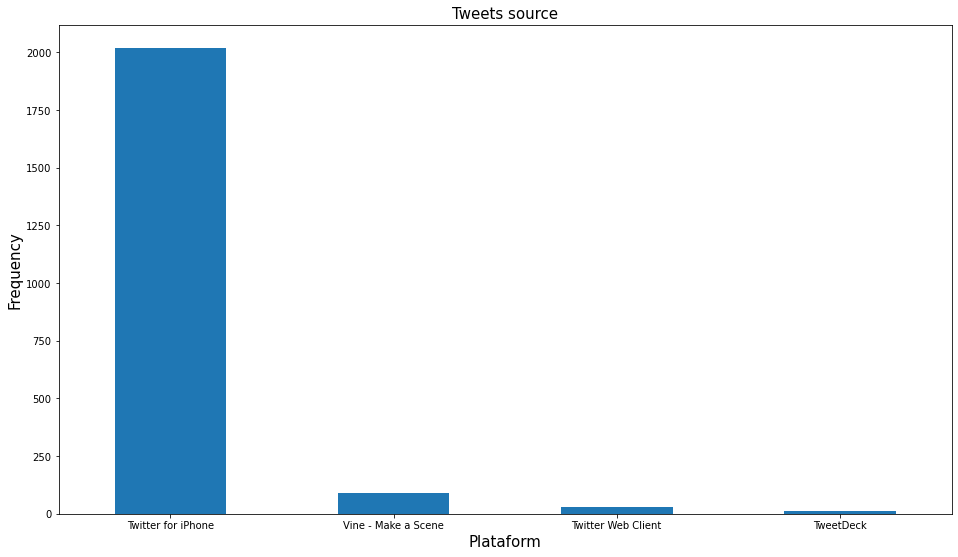

In [93]:
plt.figure(figsize = (16,9))
df_tw_en['source'].value_counts().plot(kind = 'bar')
plt.xlabel('Plataform', fontsize = 15)
plt.xticks(rotation = 0, fontsize = 10)
plt.ylabel('Frequency', fontsize = 15)
plt.title('Tweets source', fontsize = 15)

#### Insights
* We can see that we have a lot more tweets comming from iphone, so we can guess that the owner of the twitter account uses it most of the time, on his/her phone.

In [94]:
df_tw_en['dog_name'].value_counts()[0:10]

Lucy       11
Charlie    11
Cooper     10
Oliver     10
Penny       9
Tucker      9
Winston     8
Lola        8
Sadie       8
Toby        7
Name: dog_name, dtype: int64

Text(0.5, 1.0, 'Most common dog names')

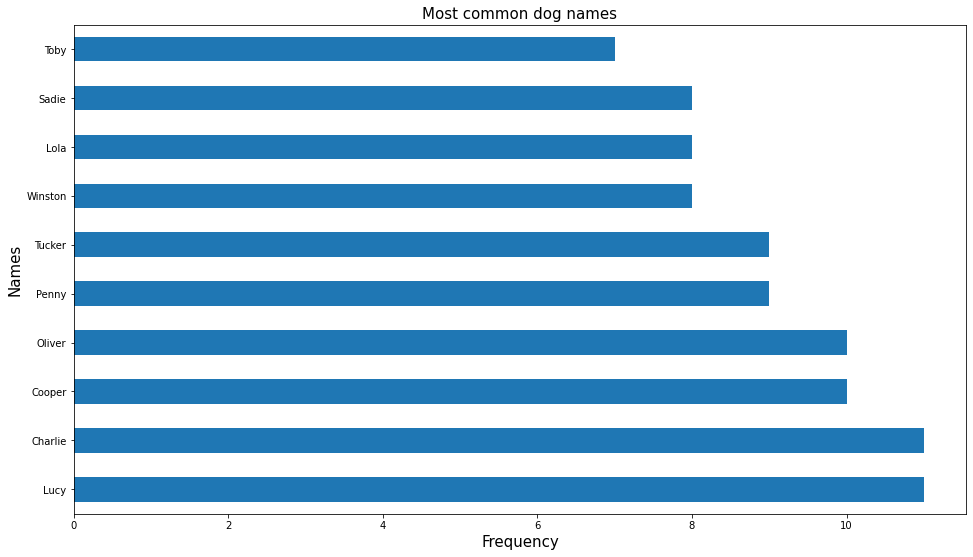

In [95]:
plt.figure(figsize = (16,9))
df_tw_en['dog_name'].value_counts()[0:10].plot(kind = 'barh')
plt.xlabel('Frequency', fontsize = 15)
plt.xticks(rotation = 0)
plt.ylabel('Names', fontsize = 15)
plt.title('Most common dog names', fontsize = 15)

#### Insights
* I did this plot just out of curiosity, so i could see the most used names

-----

Thats it! I will leave a good luck charm here in the end, because i loved this project! And i hope that with this knowledge i will gather the tweets from the WeRateDogs just to see if i can find one Akita =)
My doggo, when he was a pupper =)

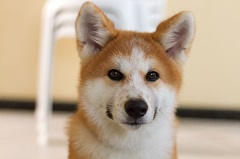